In [5]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#LOADING THE DATASET

In [6]:
# Load CATS vs DOGS dataset
dataset_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=dataset_url, extract=True)
base_dir = os.path.dirname(path_to_zip)  # Get the base directory

# Directory paths
train_dir = os.path.join(base_dir, 'cats_and_dogs_filtered', 'train')
validation_dir = os.path.join(base_dir, 'cats_and_dogs_filtered', 'validation')


In [7]:
# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#LeNet-5

In [8]:
def build_lenet5(input_shape):
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(120, kernel_size=(5, 5), activation='tanh'),
        layers.Flatten(),
        layers.Dense(84, activation='tanh'),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    return model

#AlexNet

In [9]:
def build_alexnet(input_shape):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.Conv2D(256, (5, 5), activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.Conv2D(384, (3, 3), activation='relu'),
        layers.Conv2D(384, (3, 3), activation='relu'),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    return model


#VGG-16

In [10]:
def build_vgg16(input_shape):
    vgg16_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in vgg16_model.layers:
        layer.trainable = False  # Freeze the base model
    model = models.Sequential([
        vgg16_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    return model


#Inception-v1

In [11]:
def build_inceptionv3(input_shape):
    inception_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in inception_model.layers:
        layer.trainable = False  # Freeze the base model
    model = models.Sequential([
        inception_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    return model



#ResNet-50

In [12]:
def build_resnet50(input_shape):
    resnet50_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in resnet50_model.layers:
        layer.trainable = False  # Freeze the base model
    model = models.Sequential([
        resnet50_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    return model


# Instantiate models

In [13]:
lenet5_model = build_lenet5((224, 224, 3))
alexnet_model = build_alexnet((224, 224, 3))
vgg16_model = build_vgg16((224, 224, 3))
resnet50_model = build_resnet50((224, 224, 3))
inceptionv3_model = build_inceptionv3((224, 224, 3))

#COMPARE

Training LeNet-5...
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - accuracy: 0.4984 - loss: 2.1991 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.5096 - loss: 0.6932 - val_accuracy: 0.4990 - val_loss: 0.6932
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.5100 - loss: 0.6936 - val_accuracy: 0.4990 - val_loss: 0.6932
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.5094 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.4940 - loss: 0.6941 - val_accuracy: 0.4990 - val_loss: 0.6932
Training AlexNet...
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.5076 - loss: 0.7065 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.5180 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.4834

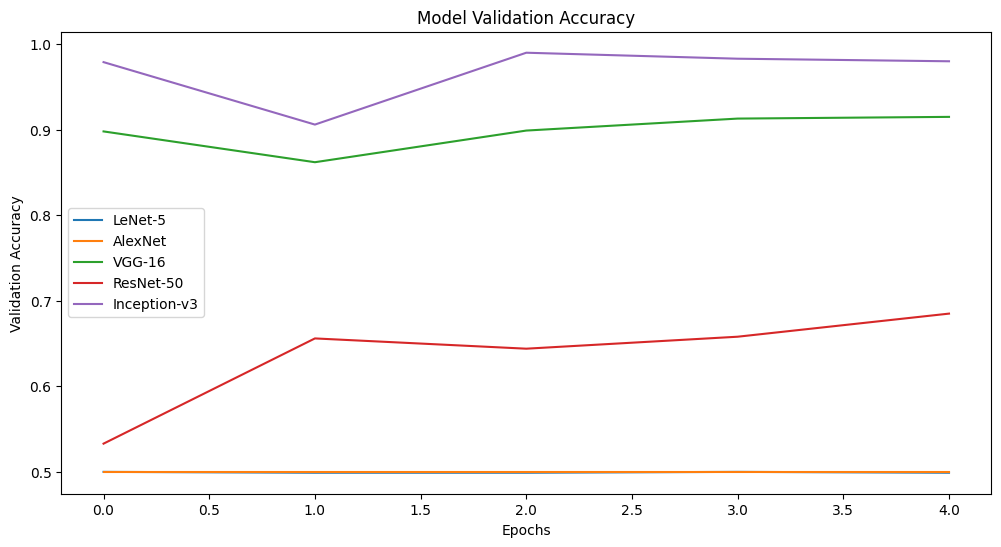

In [14]:
models_to_train = [lenet5_model, alexnet_model, vgg16_model, resnet50_model, inceptionv3_model]
model_names = ['LeNet-5', 'AlexNet', 'VGG-16', 'ResNet-50', 'Inception-v3']
histories = []

for i, model in enumerate(models_to_train):
    print(f'Training {model_names[i]}...')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(train_generator, epochs=5, validation_data=validation_generator)
    histories.append(history)

# Visualize accuracy
plt.figure(figsize=(12, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=model_names[i])
plt.title('Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()
